In [1]:
import numpy as np
import pandas as pd

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, 
                                                    iris_dataset['target'].reshape(-1,1),
                                                    test_size=0.2,
                                                    random_state=0) # random_state - для воспроизводимости

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}') # test_size = 0.25

X_train shape: (120, 4), y_train shape: (120, 1),
X_test shape: (30, 4), y_test shape: (30, 1)


In [13]:
df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
df['type'] = iris_dataset['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- Entropy (Энтропия)\
$E = \sum{}{}-p_i\cdot \log{2}{p_i}$, где $p_i =$ *probability of class i*

- Gini Index (Индекс Джини)\
$G = 1 - \sum{}{}(p_i)^2$

- MSE (квадратичная ошибка)\
$squared error = \sum{}{}(y - \widetilde{y})^2$

- MAE (абсолютная ошибка)\
$absolute error = \sum{}{}|y - \widetilde{y}|$

- Information Gain (Прирост информации)\
$IG = E(parent) - \sum{}{}w_i\cdot E(child_i)$

In [14]:
%run -m CART

In [15]:
classifier = ClassificationAndRegressionTrees(min_samples_split=3, max_depth=3, criterion="entropy")
classifier.fit(X_train,y_train)
classifier.print_tree()
# feature_names=list(iris_dataset.feature_names)

X_2 <= 1.700
|   left: 0.0000
|   right: X_3 <= 1.700
|   |   left: X_2 <= 4.900
|   |   |   left: X_3 <= 1.600
|   |   |   |   left: 1.0000
|   |   |   |   right: 2.0000
|   |   |   right: X_3 <= 1.500
|   |   |   |   left: 2.0000
|   |   |   |   right: 1.0000
|   |   right: X_2 <= 4.800
|   |   |   left: 2.0000
|   |   |   right: 2.0000


In [16]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test) 
accuracy_score(y_test, y_pred)

0.9333333333333333

[Text(0.375, 0.875, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.125, 0.125, 'entropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.375, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

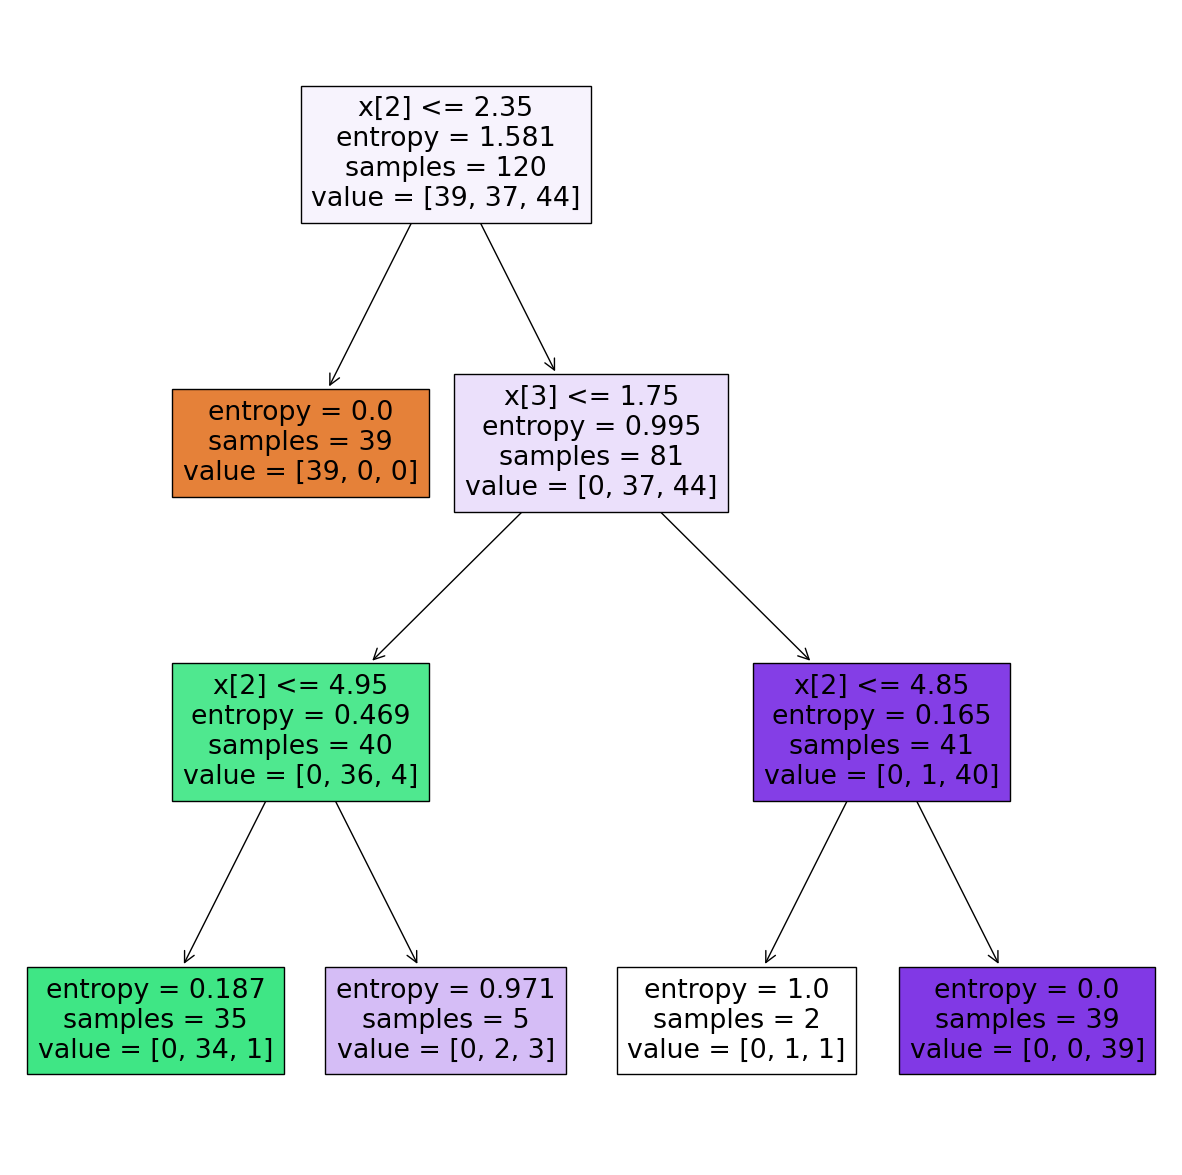

In [18]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree



check_model = DecisionTreeClassifier(min_samples_split=3, max_depth=3, criterion='entropy').fit(X_train,y_train)

plt.figure(figsize=(15,15))
plot_tree(check_model, filled=True, impurity=True) 

In [19]:
y_pred_check = check_model.predict(X_test)
accuracy_score(y_test, y_pred_check)

0.9666666666666667

In [20]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=20)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y.reshape(-1,1), test_size=0.2, random_state=0)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape},\n', f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (800, 20), y_train shape: (800, 1),
 X_test shape: (200, 20), y_test shape: (200, 1)


In [9]:
regressor = ClassificationAndRegressionTrees(min_samples_split=3, max_depth=3, criterion="squared_error")
regressor.fit(X_train,y_train)
regressor.print_tree()

X_17 <= 0.095
|   left: X_1 <= -0.686
|   |   left: X_16 <= -0.739
|   |   |   left: X_17 <= -0.677
|   |   |   |   left: -428.3806
|   |   |   |   right: -233.6639
|   |   |   right: X_17 <= -1.256
|   |   |   |   left: -266.8210
|   |   |   |   right: -141.6432
|   |   right: X_16 <= -0.326
|   |   |   left: X_1 <= 0.285
|   |   |   |   left: -196.0548
|   |   |   |   right: -72.9902
|   |   |   right: X_16 <= 1.596
|   |   |   |   left: -9.7607
|   |   |   |   right: 199.5515
|   right: X_1 <= -0.566
|   |   left: X_16 <= -0.734
|   |   |   left: X_17 <= 0.899
|   |   |   |   left: -271.6214
|   |   |   |   right: -126.1843
|   |   |   right: X_17 <= 1.464
|   |   |   |   left: -23.3343
|   |   |   |   right: 119.0199
|   |   right: X_16 <= 0.155
|   |   |   left: X_1 <= 0.719
|   |   |   |   left: 36.9005
|   |   |   |   right: 184.9559
|   |   |   right: X_17 <= 1.945
|   |   |   |   left: 208.7223
|   |   |   |   right: 478.7887


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MAE: 102.11610820023911
MSE: 15756.154079725906
R^2: 0.43519969489023846


[Text(0.5, 0.875, 'x[19] <= 0.019\nsquared_error = 41921.913\nsamples = 800\nvalue = 4.619'),
 Text(0.25, 0.625, 'x[13] <= -0.114\nsquared_error = 36467.664\nsamples = 414\nvalue = -78.105'),
 Text(0.125, 0.375, 'x[16] <= -0.143\nsquared_error = 30004.42\nsamples = 174\nvalue = -168.424'),
 Text(0.0625, 0.125, 'squared_error = 25832.306\nsamples = 81\nvalue = -243.065'),
 Text(0.1875, 0.125, 'squared_error = 24559.657\nsamples = 93\nvalue = -103.415'),
 Text(0.375, 0.375, 'x[3] <= -0.342\nsquared_error = 30951.536\nsamples = 240\nvalue = -12.624'),
 Text(0.3125, 0.125, 'squared_error = 24139.951\nsamples = 93\nvalue = -111.149'),
 Text(0.4375, 0.125, 'squared_error = 25234.392\nsamples = 147\nvalue = 49.708'),
 Text(0.75, 0.625, 'x[12] <= 0.214\nsquared_error = 32560.142\nsamples = 386\nvalue = 93.343'),
 Text(0.625, 0.375, 'x[3] <= -0.177\nsquared_error = 26410.959\nsamples = 215\nvalue = 23.455'),
 Text(0.5625, 0.125, 'squared_error = 22849.783\nsamples = 90\nvalue = -55.491'),
 Text

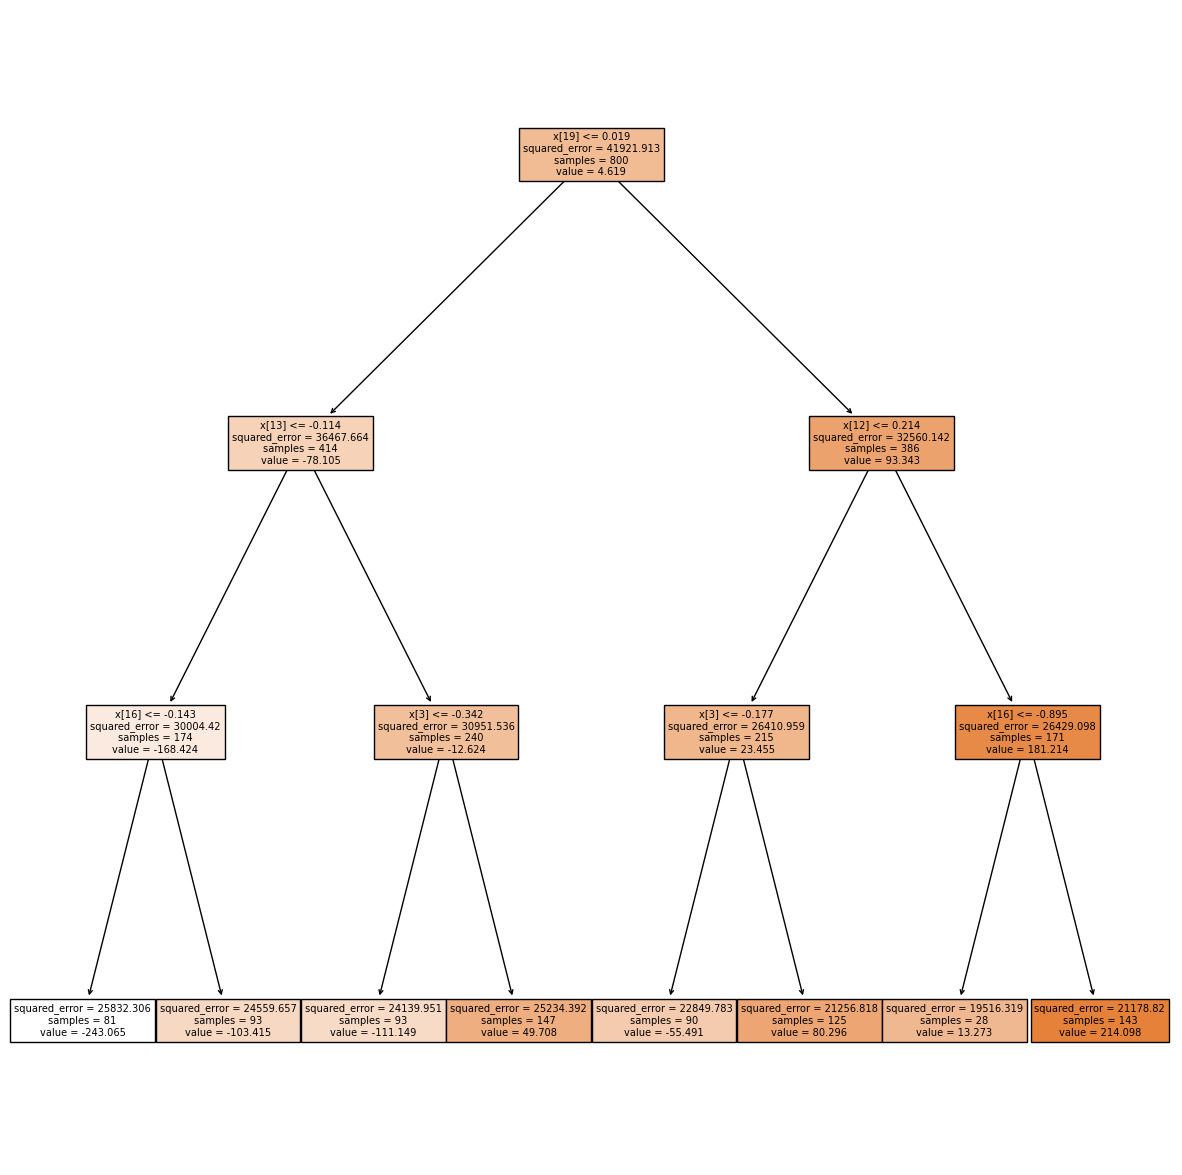

In [22]:
from sklearn.tree import DecisionTreeRegressor


check_model = DecisionTreeRegressor(min_samples_split=3, max_depth=3, criterion="squared_error").fit(X_train, y_train)

plt.figure(figsize=(15,15))
plot_tree(check_model, filled=True, impurity=True) 

In [23]:
y_pred = check_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

MAE: 125.63563644493335
MSE: 26550.465107854176
R^2: 0.3516858477285766
